## Preamble
________

In [1]:
!pip install -r ../requirements.txt

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import pandas as pd
import numpy as np

from scipy import stats
from mlxtend.preprocessing import minmax_scaling

# This is just to make the presentation cleaner, but warnings need to be analyzed and fixed.
# But I dint have time for it. 
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

np.random.seed(0)


%run functions.ipynb

# ------------------ PART 1: Ingestion and exploratory analysis -----------------

## Data
________

**TODO**

* Download the latest version of the dataset from [here](https://www.kaggle.com/kemical/kickstarter-projects/download)

In [3]:
BASE_PATH = '/home/matias/data/ks-projects'

list_relevant_cols = ['goal',
                      'usd_goal_real',                     
                      'pledged', 
                      'usd_pledged_real'
                     ]


df16 = build_df_from_csv('ks-projects-201612.csv', BASE_PATH, clean_headers = True) # incomplete on usd_pledge_real, usd_goal_real
df18 = build_df_from_csv('ks-projects-201801.csv', BASE_PATH, clean_headers = True) # complete

Reading: ks-projects-201612.csv
clean_headers: True
all cols casted to lowercase and whitespaces stripped ✓
shape: (323750, 17)
columns: ['id', 'name', 'category', 'main_category', 'currency', 'deadline', 'goal', 'launched', 'pledged', 'state', 'backers', 'country', 'usd pledged', 'unnamed: 13', 'unnamed: 14', 'unnamed: 15', 'unnamed: 16']
pc_number_of_null_values: 0.235868

Reading: ks-projects-201801.csv
clean_headers: True
all cols casted to lowercase and whitespaces stripped ✓
shape: (378661, 15)
columns: ['id', 'name', 'category', 'main_category', 'currency', 'deadline', 'goal', 'launched', 'pledged', 'state', 'backers', 'country', 'usd pledged', 'usd_pledged_real', 'usd_goal_real']
pc_number_of_null_values: 0.000669



<AxesSubplot:>

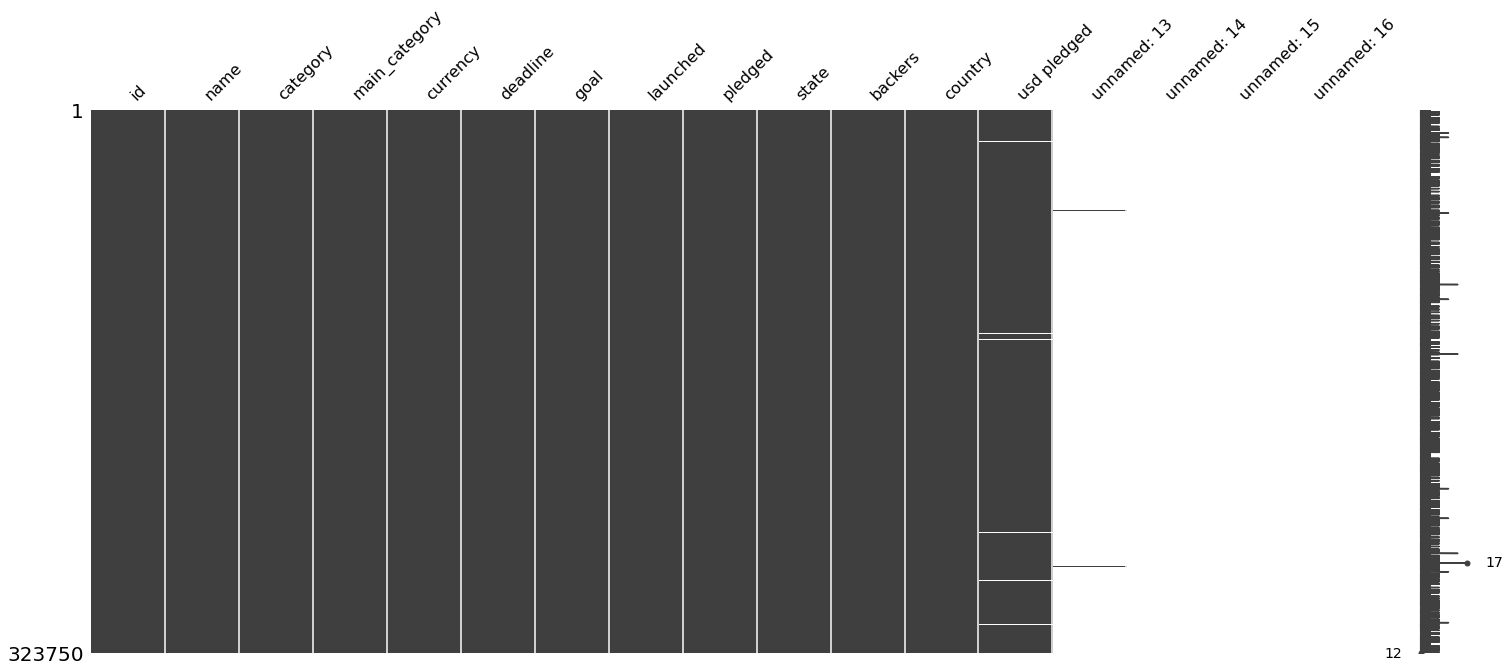

In [4]:
msno.matrix(df16)

<AxesSubplot:>

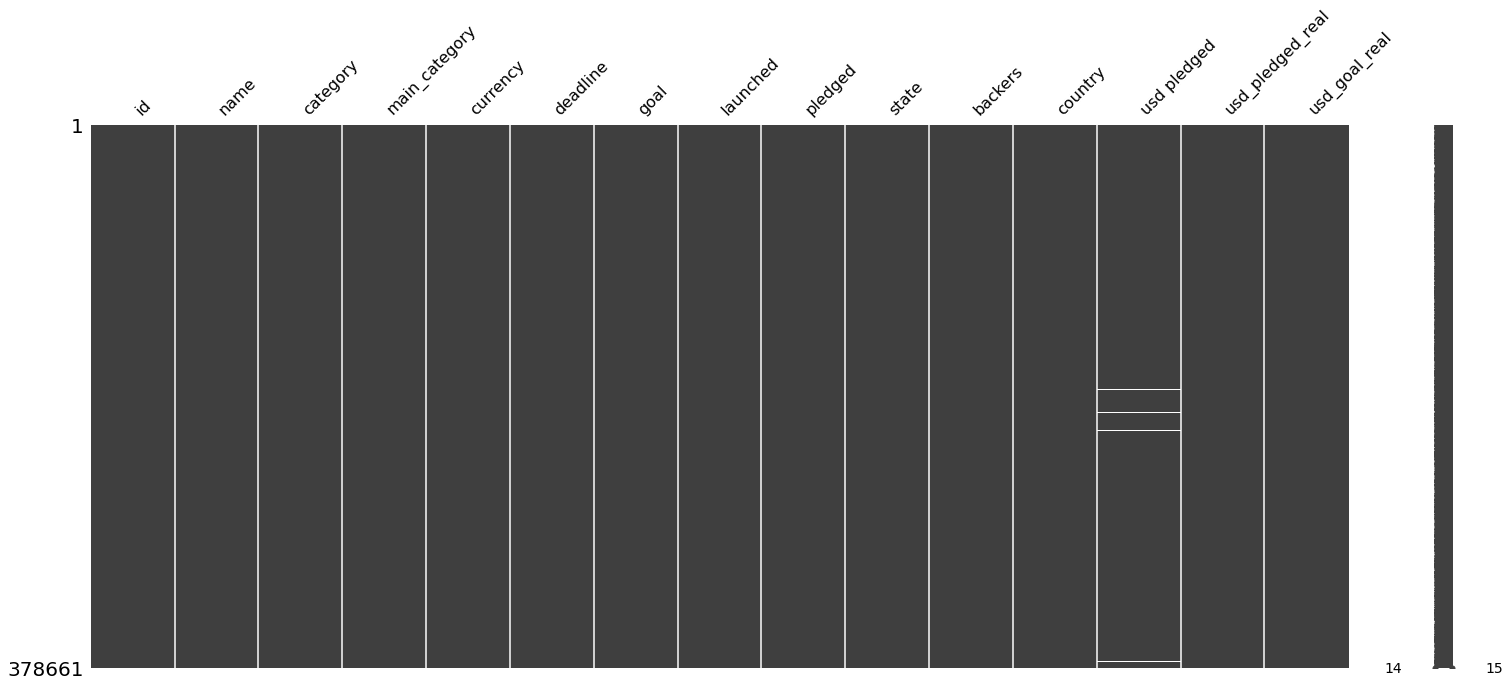

In [5]:
msno.matrix(df18)

In [6]:
# The data quality of df16 is clearly inferior: 
# 1. Does not contain important cols: 'usd_pledged_real', 'usd_goal_real'
# 2. Contains "unnamed" cols that are just nulls. 
# 3. Some cols needs to be casted to float. 
compare_datasets_cols_and_dtypes(df16,df18)

exclusive_cols_from_first_df: {'unnamed: 13', 'unnamed: 15', 'unnamed: 14', 'unnamed: 16'}

exclusive_cols_from_second_df: {'usd_goal_real', 'usd_pledged_real'}
                 datatype_1 datatype_2
id                    int64      int64
name                 object     object
category             object     object
main_category        object     object
currency             object     object
deadline             object     object
goal                 object    float64
launched             object     object
pledged              object    float64
state                object     object
backers              object      int64
country              object     object
usd pledged          object    float64
unnamed: 13          object        NaN
unnamed: 14          object        NaN
unnamed: 15          object        NaN
unnamed: 16         float64        NaN
usd_pledged_real        NaN    float64
usd_goal_real           NaN    float64


# ------------------------------ PART 2: Transformations ----------------------------------

* NOTE 1: For the sake of simplicity, I'll assume that df16['goal'] and df18['goal'] are R.V. with the same distribution (which is realistic, they should practically be the same over two consecutive years, unless some major event like COVID-19 had impacted). Same with column 'pledge'.

**With this assumption in mind, I can discard df16 as the data quality is lower.**


* NOTE 2: To "formally" validate this assumption, the steps should be: 
 1. Fix the datatypes in df16, and then "visually" compare the data distribution of df16 vs df18, 
    by plotting histograms for cols "goal" and "pledge"
 2. Run some hypothesis tests (like parametric tests for equals distributions, etc)

###   --------------------------------------------------  Scaling --------------------------------------------------

**TODO**

* Scale the `usd_goal_real` from 0 to 1
* Plot the original & scaled data together to compare


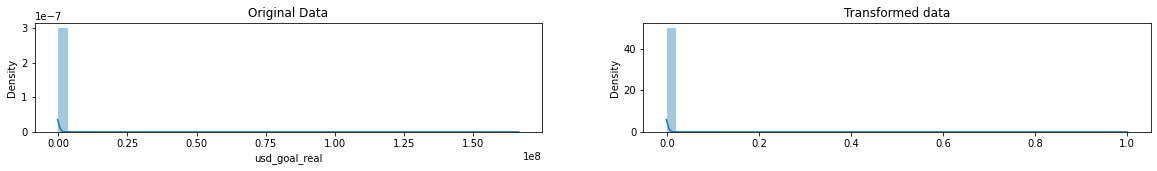

In [7]:
# This data presents the typical L-shape; lots of records have a value of zero, very few have large values. 
# Scaling just changes the range of values, it doesnt change the L-shape.
# However, it is still very important for prediction. 
# Example: We have features F1 and F2, to predict target Y. 
# F1 varies between 0 and 9999. 
# F2 varies between 0 and 5. 
# In this situation, F1 provides a much stronger signal, and thus Y varies much more with F1 than F2. 
# To avoid this "over-signal", both F1 and F2 should be scaled to same range (for example. 0-1)

minmax_scaling_and_plot_comparison(df18['usd_goal_real'])

**TODO**

* Scale the `goal` from 0 to 1
 Plot the original & scaled data together to compare

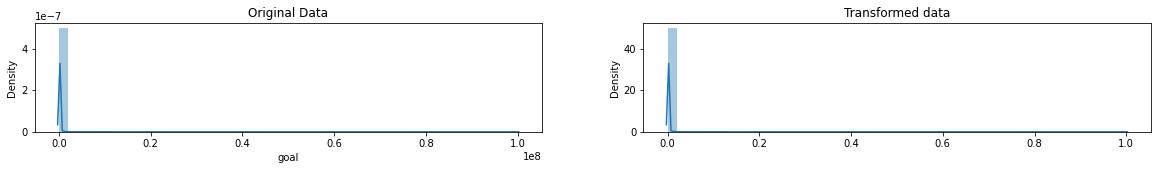

In [8]:
minmax_scaling_and_plot_comparison(df18['goal'])

###   --------------------------------------------------  Normalization --------------------------------------------------

**TODO**

* Normalize the `usd_pledged_real` column with a [`Box-Cox`](https://en.wikipedia.org/wiki/Power_transform#Box–Cox_transformation)
* Plot the original & normalzied data together to compare


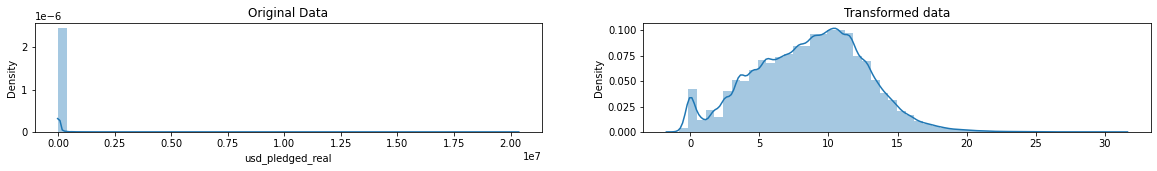

In [9]:
# Box Cox works with strictly positive values
# Besides, 0 is the most frequent value. In other words, if I "fix" the distribution like this:
# 0 + 0.001, I could run Cox-Box on the whole dataset, but it will just increase the hump just above the zero. 
# Therefore, better to just discard all the zeroes, to visualize what is really interesting: those who got money pledged.
normalize_with_box_cox_and_plot_comparison(get_series_of_strictly_positive_values(df18, 'usd_pledged_real'))

**TODO**
* Normalize the `pledged` column with a [`Box-Cox`](https://en.wikipedia.org/wiki/Power_transform#Box–Cox_transformation)
* Plot the original & normalzied data together to compare

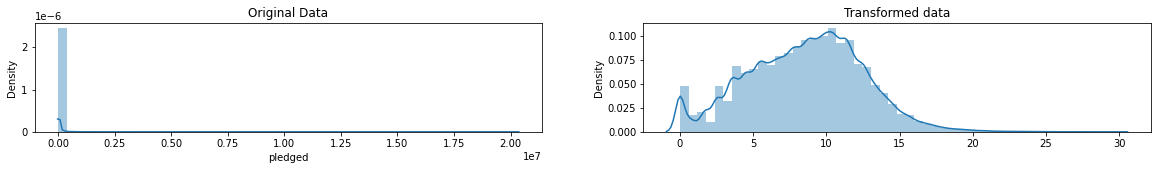

In [10]:
normalize_with_box_cox_and_plot_comparison(get_series_of_strictly_positive_values(df18, 'pledged'))